<a href="https://colab.research.google.com/github/mboytchev/P5A_Rugby_Vision/blob/main/Utilisation_du_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

pose
pose

image 1/1 /content/2_mp4-0003_jpg.rf.c825ca9ff11aa6c2254504b2265e2c08.jpg: 384x640 1 poteaux, 2510.2ms
Speed: 2.6ms preprocess, 2510.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/2_mp4-0003_jpg.rf.c825ca9ff11aa6c2254504b2265e2c08.jpg: 384x640 1 Terrain, 1933.4ms
Speed: 1.7ms preprocess, 1933.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


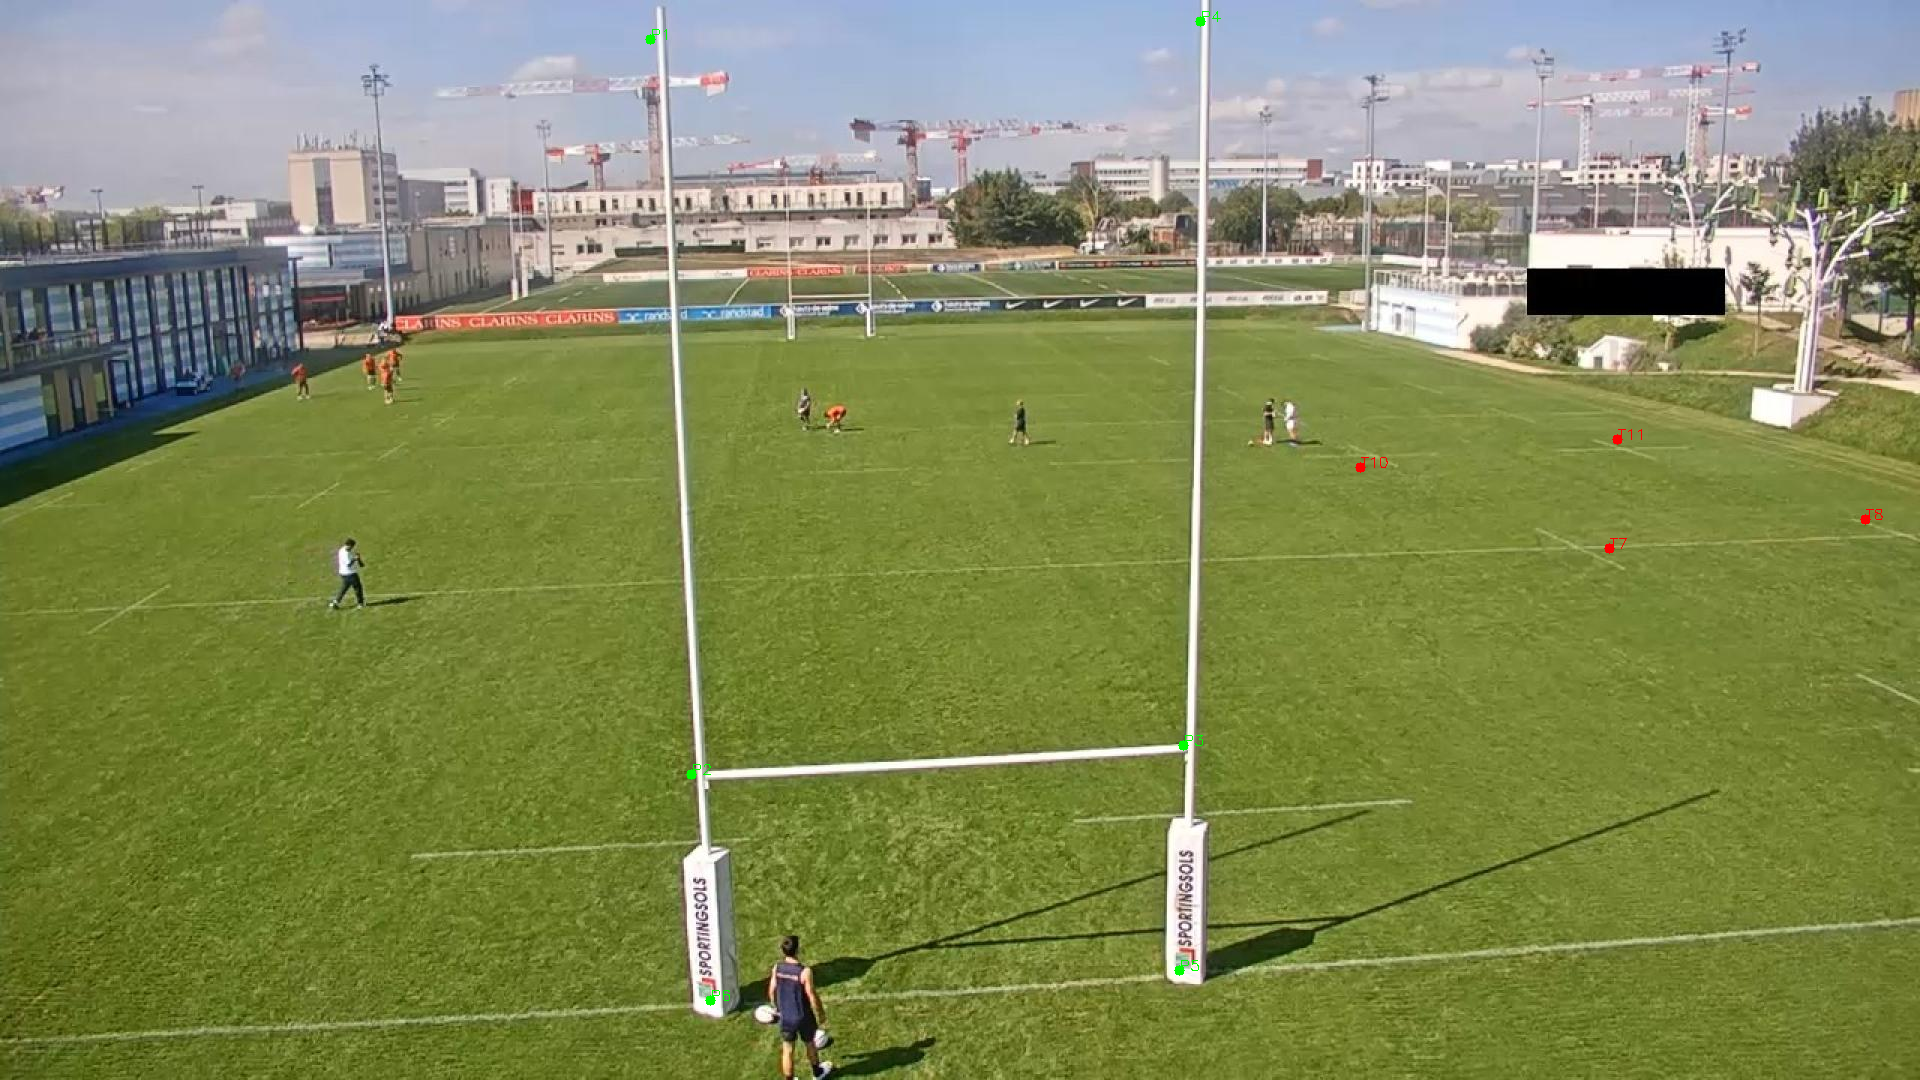

Keypoints validés (Poteaux) : [{'keypoint_id': 1, 'x': 650.6604614257812, 'y': 39.45062255859375}, {'keypoint_id': 2, 'x': 691.182373046875, 'y': 774.0670166015625}, {'keypoint_id': 3, 'x': 1183.704833984375, 'y': 745.4910278320312}, {'keypoint_id': 4, 'x': 1200.697021484375, 'y': 21.443939208984375}, {'keypoint_id': 5, 'x': 1179.914306640625, 'y': 970.92333984375}, {'keypoint_id': 6, 'x': 710.7471313476562, 'y': 1000.8656616210938}]
Keypoints validés (Terrain) : [{'keypoint_name': '15_32', 'x': 1609.241455078125, 'y': 548.3363647460938}, {'keypoint_name': '15_50', 'x': 1865.57958984375, 'y': 519.8656005859375}, {'keypoint_name': '5_32', 'x': 1360.9586181640625, 'y': 467.7007141113281}, {'keypoint_name': '15_50', 'x': 1617.206298828125, 'y': 439.5127258300781}]


In [4]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Charger les modèles entraînés
model_poteaux = YOLO("/content/modèle_poteau_50.pt")
model_terrain = YOLO("/content/terrain_50.pt")

# Chemin de l'image
image_path = "/content/2_mp4-0003_jpg.rf.c825ca9ff11aa6c2254504b2265e2c08.jpg"


print(model_poteaux.task)  # Affiche le type de tâche ('pose', 'detect', etc.)
print(model_terrain.task)

# Effectuer une inférence pour chaque modèle
results_poteaux = model_poteaux(image_path)
results_terrain = model_terrain(image_path)
#for r in results_poteaux:
 #   print("results_poteaux")
  #  print(r.boxes)  # Boîtes englobantes
   # print(r.keypoints)  # Points clés (pose estimation)
#for r in results_terrain :
  #  print("results_terrain")
   # print(r.boxes)
    #print(r.keypoints)
# Charger l'image
image = cv2.imread(image_path)

# Seuil de confiance minimum
confidence_threshold = 0.7

# Couleurs pour les keypoints des deux modèles
color_pteaux = (0, 255, 0)  # Vert pour le modèle "Pteaux"
color_terrain = (0, 0, 255)  # Rouge pour le modèle "Terrain"

# Ajouter les keypoints du modèle "Pteaux"
for instance_idx, keypoints in enumerate(results_poteaux[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Dessiner le point clé
            cv2.circle(image, (int(x.item()), int(y.item())), 5, color_pteaux, -1)
            # Annoter avec l'ID du keypoint
            cv2.putText(
                image, f"P{keypoint_idx + 1}", (int(x.item()), int(y.item())),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=color_pteaux, thickness=1
            )

# Ajouter les keypoints du modèle "Terrain"
for instance_idx, keypoints in enumerate(results_terrain[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Dessiner le point clé
            cv2.circle(image, (int(x.item()), int(y.item())), 5, color_terrain, -1)
            # Annoter avec l'ID du keypoint
            cv2.putText(
                image, f"T{keypoint_idx + 1}", (int(x.item()), int(y.item())),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=color_terrain, thickness=1
            )

# Afficher l'image avec les keypoints des deux modèles
cv2_imshow(image)


# Seuil de confiance minimum
confidence_threshold = 0.7

# Récupérer les keypoints validés du modèle "Poteaux"
filtered_keypoints_poteaux = []
for instance_idx, keypoints in enumerate(results_poteaux[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Ajouter l'ID, les coordonnées et la confiance à la liste
            filtered_keypoints_poteaux.append({
                "keypoint_id": keypoint_idx + 1,  # ID du keypoint
                "x": x.item(),
                "y": y.item()
            })

# Récupérer les keypoints validés du modèle "Terrain"
# Récupérer et renommer les keypoints validés du modèle "Terrain"
filtered_keypoints_terrain = []
for keypoint_idx, keypoints in enumerate(results_terrain[0].keypoints.data):
    for kp_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Déterminer le type de ligne et inclure dans le nom
            if kp_idx + 1 in [5]:  # Keypoints pour la ligne des 22 m
                keypoint_name = ""
            elif kp_idx + 1 in [6]:  # Keypoints pour la ligne des 15 m
                keypoint_name = f"P{kp_idx + 1}_ligne_15m"
            elif kp_idx + 1 in [7]:  # Keypoints pour la ligne des 22 m
                keypoint_name = "15_32"
            elif  kp_idx + 1 in [8]:  # Keypoints pour la ligne des 15 m
                keypoint_name = "15_50"
            elif kp_idx + 1 in [9]:  # Keypoints pour la ligne des 10 m
                keypoint_name = f"T{kp_idx + 1}_ligne_10m"
            elif kp_idx + 1 in [10]:  # Keypoints pour la ligne des 10 m
                keypoint_name = "5_32"
            elif kp_idx + 1 in [11]:
              keypoint_name = "15_50"
            elif kp_idx + 1 in [12]:
              keypoint_name = f"T{kp_idx + 1}_ligne_10m"
            else:
                keypoint_name = f"T{kp_idx + 1}_autre"  # Par défaut, si un keypoint n'appartient pas à ces lignes

            # Ajouter les informations à la liste
            filtered_keypoints_terrain.append({
                "keypoint_name": keypoint_name,
                "x": x.item(),
                "y": y.item()
            })



# Afficher les résultats
print("Keypoints validés (Poteaux) :", filtered_keypoints_poteaux)
print("Keypoints validés (Terrain) :", filtered_keypoints_terrain)

In [3]:
import cv2
from ultralytics import YOLO

# Charger le modèle
model = YOLO("/content/terrain_50.pt")

# Charger la vidéo
video_path = "/content/2.mp4"
output_path = "/content/output_video.mp4"
confidence_threshold = 0.7  # Seuil de confiance minimum

# Lire la vidéo
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec pour la vidéo de sortie
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Fin de la vidéo

    # Effectuer une inférence sur la frame
    results = model(frame)

    # Dessiner les keypoints sur la frame
    for instance_idx, keypoints in enumerate(results[0].keypoints.data):
        for keypoint_idx, (x, y, conf) in enumerate(keypoints):
            if conf.item() >= confidence_threshold:  # Vérifier la confiance
                # Dessiner le point clé
                cv2.circle(frame, (int(x.item()), int(y.item())), 5, (0, 255, 0), -1)
                # Annoter avec l'ID du keypoint
                cv2.putText(
                    frame, str(keypoint_idx + 1), (int(x.item()), int(y.item())),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 0, 0), thickness=1
                )

    # Ajouter la frame annotée à la vidéo de sortie
    out.write(frame)
    frame_idx += 1
    print(f"Frame {frame_idx} traitée")

# Libérer les ressources
cap.release()
out.release()
print(f"Vidéo annotée sauvegardée sous : {output_path}")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
0: 384x640 1 Terrain, 1923.2ms
Speed: 2.3ms preprocess, 1923.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Frame 187 traitée

0: 384x640 1 Terrain, 1922.9ms
Speed: 3.0ms preprocess, 1922.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Frame 188 traitée

0: 384x640 1 Terrain, 1918.4ms
Speed: 2.0ms preprocess, 1918.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Frame 189 traitée

0: 384x640 1 Terrain, 1926.3ms
Speed: 1.7ms preprocess, 1926.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Frame 190 traitée

0: 384x640 1 Terrain, 1934.0ms
Speed: 1.6ms preprocess, 1934.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Frame 191 traitée

0: 384x640 1 Terrain, 2241.3ms
Speed: 3.2ms preprocess, 2241.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Frame 192 traitée

0: 384x640 1 Terrain, 1929.4

KeyboardInterrupt: 